In [1]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF'
path = '/content/drive/My Drive/master project/data/VAR'

Mounted at /content/drive


In [2]:
import missingno as mno
import missingno as msno
from sklearn import linear_model
%matplotlib inline
import matplotlib

In [3]:
df = pd.read_csv(os.path.join(path, 'Complete_data.csv'))

In [4]:
df=df.drop(['Unnamed: 0'], axis=1)
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['US_inflation_rate'] = df['US_inflation_rate'].str.rstrip('%').astype(float) / 100
df['US_inflation_rate'] = df['US_inflation_rate'].round(4)
df['US_Treasury_Yield'] = pd.to_numeric(df['US_Treasury_Yield'], errors='coerce')
df['Gold'] = pd.to_numeric(df['Gold'].str.replace(',', ''), errors='coerce')
df['S&P500'] = pd.to_numeric(df['S&P500'].str.replace(',', ''), errors='coerce')
df['NASDAQ'] = pd.to_numeric(df['NASDAQ'].str.replace(',', ''), errors='coerce')
df['BTC'] = pd.to_numeric(df['BTC'].str.replace(',', ''), errors='coerce')
df.fillna(method='ffill', inplace=True)

<ipython-input-19-d4f1a7dd7114>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [ ]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])

In [ ]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])

In [ ]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])

In [ ]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])

In [ ]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])

In [ ]:
df_META.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               753 non-null    datetime64[ns]
 1   Stockprice_META    753 non-null    float64       
 2   sentiment_META     753 non-null    float64       
 3   Interest           753 non-null    float64       
 4   UNEMPLOYMENT       753 non-null    float64       
 5   CPI                753 non-null    float64       
 6   US_Treasury_Yield  753 non-null    float64       
 7   RETAIL_SALES       753 non-null    float64       
 8   US_inflation_rate  753 non-null    float64       
 9   Real_GDP           753 non-null    float64       
 10  US_Dollar_Index    753 non-null    float64       
 11  S&P500             753 non-null    float64       
 12  NASDAQ             753 non-null    float64       
 13  WTI                753 non-null    float64       
 14  BTC       

In [ ]:
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               753 non-null    datetime64[ns]
 1   Stockprice_AAPL    753 non-null    float64       
 2   sentiment_AAPL     753 non-null    float64       
 3   Interest           753 non-null    float64       
 4   UNEMPLOYMENT       753 non-null    float64       
 5   CPI                753 non-null    float64       
 6   US_Treasury_Yield  753 non-null    float64       
 7   RETAIL_SALES       753 non-null    float64       
 8   US_inflation_rate  753 non-null    float64       
 9   Real_GDP           753 non-null    float64       
 10  US_Dollar_Index    753 non-null    float64       
 11  S&P500             753 non-null    float64       
 12  NASDAQ             753 non-null    float64       
 13  WTI                753 non-null    float64       
 14  BTC       

In [ ]:
df_MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               753 non-null    datetime64[ns]
 1   Stockprice_MSFT    753 non-null    float64       
 2   sentiment_MSFT     753 non-null    float64       
 3   Interest           753 non-null    float64       
 4   UNEMPLOYMENT       753 non-null    float64       
 5   CPI                753 non-null    float64       
 6   US_Treasury_Yield  753 non-null    float64       
 7   RETAIL_SALES       753 non-null    float64       
 8   US_inflation_rate  753 non-null    float64       
 9   Real_GDP           753 non-null    float64       
 10  US_Dollar_Index    753 non-null    float64       
 11  S&P500             753 non-null    float64       
 12  NASDAQ             753 non-null    float64       
 13  WTI                753 non-null    float64       
 14  BTC       

In [ ]:
df_NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               753 non-null    datetime64[ns]
 1   Stockprice_NVDA    753 non-null    float64       
 2   sentiment_NVDA     753 non-null    float64       
 3   Interest           753 non-null    float64       
 4   UNEMPLOYMENT       753 non-null    float64       
 5   CPI                753 non-null    float64       
 6   US_Treasury_Yield  753 non-null    float64       
 7   RETAIL_SALES       753 non-null    float64       
 8   US_inflation_rate  753 non-null    float64       
 9   Real_GDP           753 non-null    float64       
 10  US_Dollar_Index    753 non-null    float64       
 11  S&P500             753 non-null    float64       
 12  NASDAQ             753 non-null    float64       
 13  WTI                753 non-null    float64       
 14  BTC       

In [ ]:
df_GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               753 non-null    datetime64[ns]
 1   Stockprice_GOOGL   753 non-null    float64       
 2   sentiment_GOOGL    753 non-null    float64       
 3   Interest           753 non-null    float64       
 4   UNEMPLOYMENT       753 non-null    float64       
 5   CPI                753 non-null    float64       
 6   US_Treasury_Yield  753 non-null    float64       
 7   RETAIL_SALES       753 non-null    float64       
 8   US_inflation_rate  753 non-null    float64       
 9   Real_GDP           753 non-null    float64       
 10  US_Dollar_Index    753 non-null    float64       
 11  S&P500             753 non-null    float64       
 12  NASDAQ             753 non-null    float64       
 13  WTI                753 non-null    float64       
 14  BTC       

In [ ]:
df_GOOG

,date,Stockprice_GOOGL,sentiment_GOOGL,Interest,UNEMPLOYMENT,CPI,US_Treasury_Yield,RETAIL_SALES,US_inflation_rate,Real_GDP,US_Dollar_Index,S&P500,NASDAQ,WTI,BTC,Gold
0,2025-02-28,170.28,0.393456,4.33,4.0,317.671,4.24,577230.0,0.030,6001.465,107.61,5954.50,18847.28,69.80,84381.2,2848.5
1,2025-02-27,168.50,0.458250,4.33,4.0,317.671,4.29,577230.0,0.030,6001.465,107.24,5861.57,18544.42,70.00,84714.6,2895.9
2,2025-02-26,172.73,0.371140,4.33,4.0,317.671,4.25,577230.0,0.030,6001.465,106.42,5956.06,19075.26,68.70,84212.7,2917.8
3,2025-02-25,175.42,0.250000,4.33,4.0,317.671,4.30,577230.0,0.030,6001.465,106.31,5955.25,19026.39,69.02,88686.0,2906.0
4,2025-02-24,179.25,0.366400,4.33,4.0,317.671,4.40,577230.0,0.030,6001.465,106.60,5983.25,19286.93,70.76,91508.5,2949.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-03-07,2527.57,0.396400,0.08,3.7,287.504,1.78,595064.0,0.075,5337.277,99.29,4201.09,12830.96,122.09,38024.8,1995.9
749,2022-03-04,2638.13,-0.128000,0.08,3.7,287.504,1.74,595064.0,0.075,5337.277,98.65,4328.87,13313.44,116.37,39142.7,1966.6
750,2022-03-03,2677.99,0.000000,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.79,4363.49,13537.94,110.52,42463.0,1935.9
751,2022-03-02,2691.43,0.177900,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.39,4386.54,13752.02,112.22,43912.8,1922.3


#Check Extreem Outlier

In [ ]:
def detect_extreme_outliers(df):
    outliers = []
    for col in df.select_dtypes(include=['number']).columns:  # ตรวจสอบเฉพาะคอลัมน์ตัวเลข
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        extreme_upper_bound = Q3 + 3 * IQR  # เกณฑ์ extreme outlier

        # ค่าที่เป็น extreme outliers
        extreme_outliers = df[df[col] > extreme_upper_bound][col]

        for val in extreme_outliers:
            outliers.append((col, val))

    return pd.DataFrame(outliers, columns=["Column", "Extreme Outlier Value"]) if outliers else None

##META

In [ ]:
extreme_outliers_df_META = detect_extreme_outliers(df_META)

if extreme_outliers_df_META is not None:
    display(extreme_outliers_df_META)
else:
    print("No extreme outliers found.")

,Column,Extreme Outlier Value
0,WTI,126.47


##AAPL

In [ ]:
extreme_outliers_df_AAPL = detect_extreme_outliers(df_AAPL)

if extreme_outliers_df_AAPL is not None:
    display(extreme_outliers_df_AAPL)
else:
    print("No extreme outliers found.")

,Column,Extreme Outlier Value
0,WTI,126.47


##MSFT

In [ ]:
extreme_outliers_df_MSFT = detect_extreme_outliers(df_MSFT)

if extreme_outliers_df_MSFT is not None:
    display(extreme_outliers_df_MSFT)
else:
    print("No extreme outliers found.")

,Column,Extreme Outlier Value
0,WTI,126.47


##NVDA

In [ ]:
extreme_outliers_df_NVDA = detect_extreme_outliers(df_NVDA)

if extreme_outliers_df_NVDA is not None:
    display(extreme_outliers_df_NVDA)
else:
    print("No extreme outliers found.")

,Column,Extreme Outlier Value
0,WTI,126.47


##GOOG

In [ ]:
extreme_outliers_df_GOOG = detect_extreme_outliers(df_GOOG)

if extreme_outliers_df_GOOG is not None:
    display(extreme_outliers_df_GOOG)
else:
    print("No extreme outliers found.")

,Column,Extreme Outlier Value
0,Stockprice_GOOGL,2235.55
1,Stockprice_GOOGL,2207.35
2,Stockprice_GOOGL,2227.07
3,Stockprice_GOOGL,2280.41
4,Stockprice_GOOGL,2313.53
...,...,...
91,Stockprice_GOOGL,2638.13
92,Stockprice_GOOGL,2677.99
93,Stockprice_GOOGL,2691.43
94,Stockprice_GOOGL,2681.23


#GOOG par

In [ ]:
start_date = "2022-03-01"
end_date = "2022-07-15"

# กรองข้อมูลเฉพาะช่วงวันที่กำหนด
mask = (df_GOOG['date'] >= start_date) & (df_GOOG['date'] <= end_date)
df_GOOG.loc[mask, 'Stockprice_GOOGL'] = df_GOOG.loc[mask, 'Stockprice_GOOGL'] / 20

In [5]:
start_date = "2022-03-01"
end_date = "2022-07-15"

# กรองข้อมูลเฉพาะช่วงวันที่กำหนด
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df.loc[mask, 'Stockprice_GOOGL'] = df.loc[mask, 'Stockprice_GOOGL'] / 20

#NVDA par

In [ ]:
start_date = "2022-03-01"
end_date = "2024-06-07"

# กรองข้อมูลเฉพาะช่วงวันที่กำหนด
mask = (df_NVDA['date'] >= start_date) & (df_NVDA['date'] <= end_date)
df_NVDA.loc[mask, 'Stockprice_NVDA'] = df_NVDA.loc[mask, 'Stockprice_NVDA'] / 10

In [6]:
start_date = "2022-03-01"
end_date = "2024-06-07"

# กรองข้อมูลเฉพาะช่วงวันที่กำหนด
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df.loc[mask, 'Stockprice_NVDA'] = df.loc[mask, 'Stockprice_NVDA'] / 10

#Export data

In [ ]:
df_META = df_META.reset_index()
df_AAPL = df_AAPL.reset_index()
df_NVDA = df_NVDA.reset_index()
df_MSFT = df_MSFT.reset_index()
df_GOOG = df_GOOG.reset_index()

In [ ]:
df_META = df_META.drop(['index'], axis=1)
df_AAPL = df_AAPL.drop(['index'], axis=1)
df_NVDA = df_NVDA.drop(['index'], axis=1)
df_MSFT = df_MSFT.drop(['index'], axis=1)
df_GOOG = df_GOOG.drop(['index'], axis=1)

In [ ]:
path_DF = '/content/drive/My Drive/master project/data/DF4'
df_META.to_csv(os.path.join(path_DF,'df_META.csv'))
df_AAPL.to_csv(os.path.join(path_DF,'df_AAPL.csv'))
df_NVDA.to_csv(os.path.join(path_DF,'df_NVDA.csv'))
df_MSFT.to_csv(os.path.join(path_DF,'df_MSFT.csv'))
df_GOOG.to_csv(os.path.join(path_DF,'df_GOOG.csv'))

# Drop date

In [ ]:
#df_GOOG = df_GOOG.drop(columns=["date"])

#Check Missing Value

<Axes: >

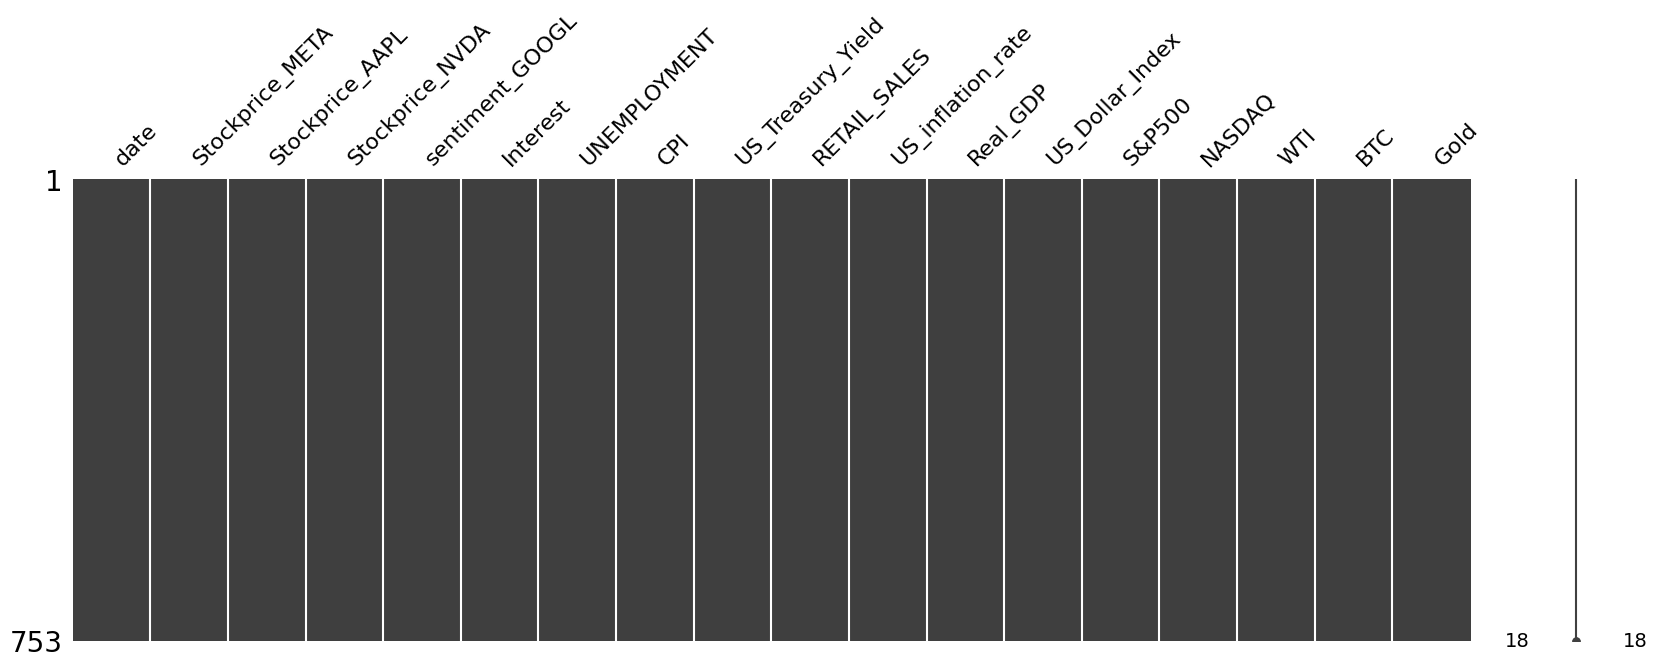

In [20]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
df.isna().sum()

,0
date,0
Stockprice_META,0
Stockprice_AAPL,0
Stockprice_NVDA,0
Stockprice_MSFT,0
Stockprice_GOOGL,0
sentiment_META,0
sentiment_AAPL,0
sentiment_NVDA,0
sentiment_MSFT,0


<Axes: >

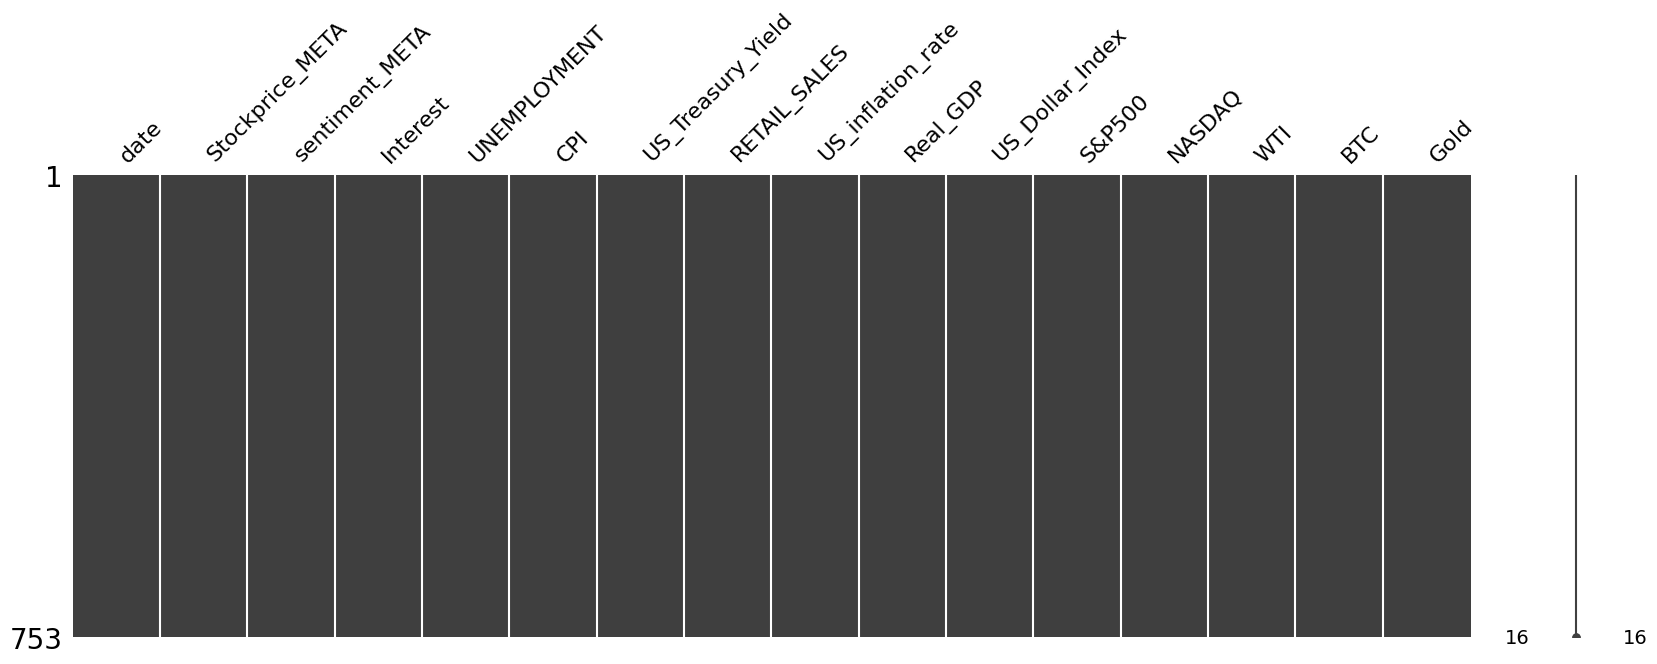

In [ ]:
mno.matrix(df_META, figsize = (20, 6))

<Axes: >

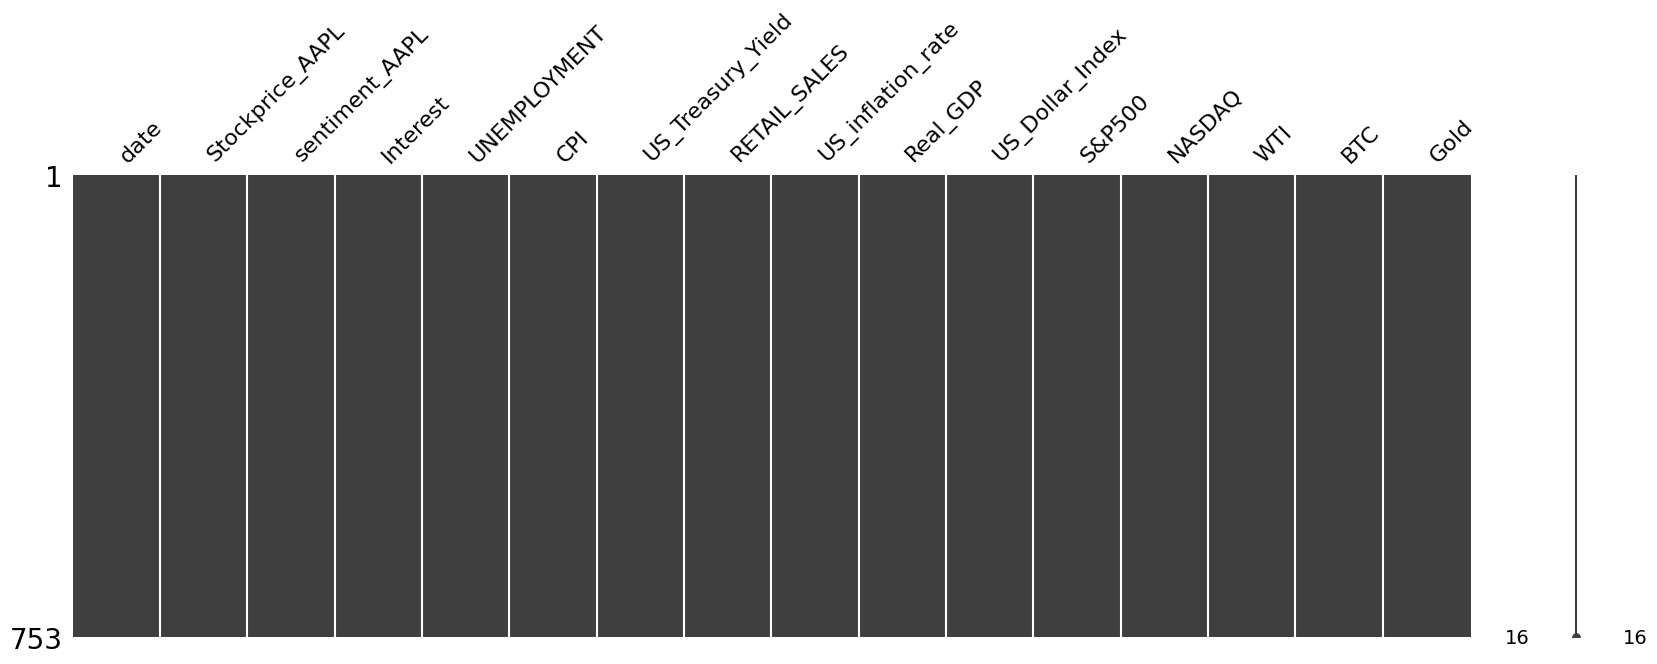

In [ ]:
mno.matrix(df_AAPL, figsize = (20, 6))

<Axes: >

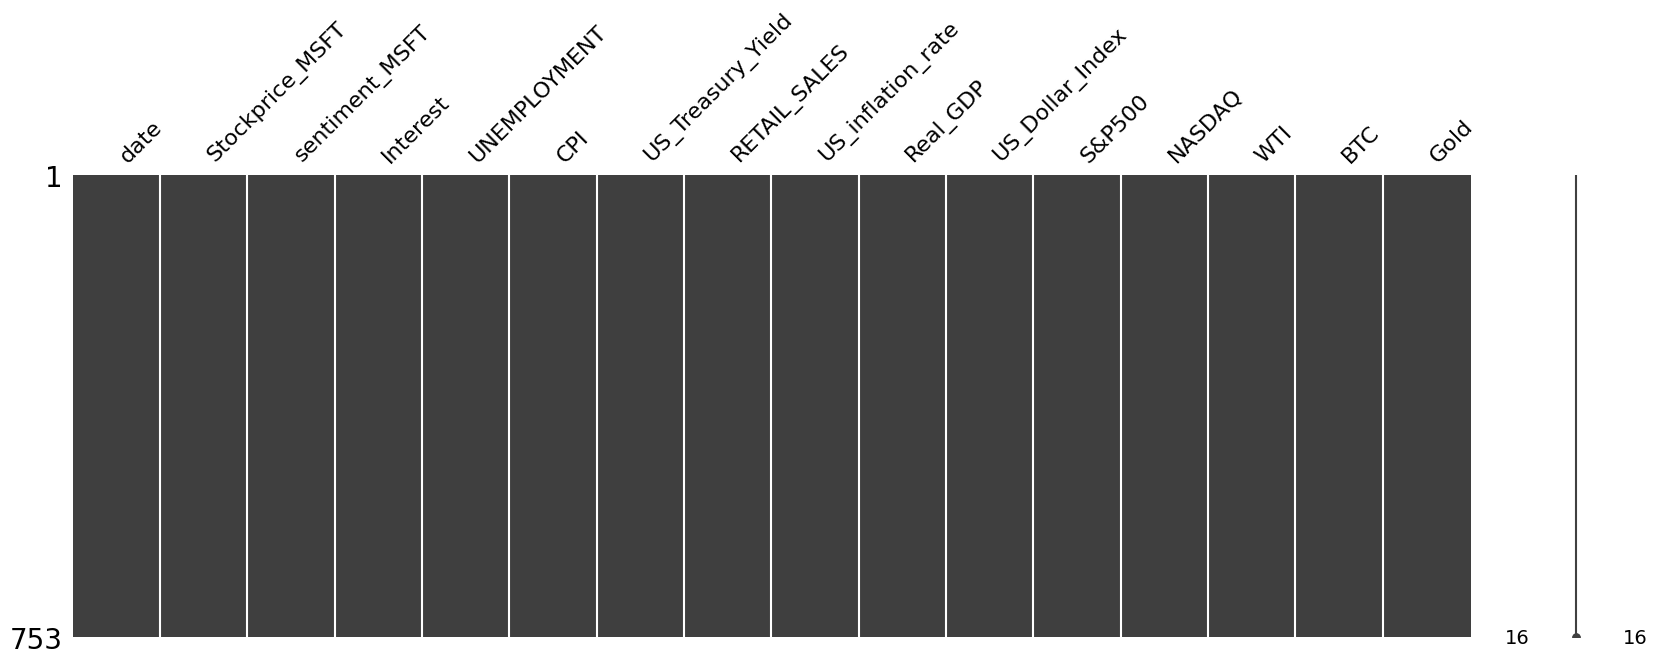

In [ ]:
mno.matrix(df_MSFT, figsize = (20, 6))

<Axes: >

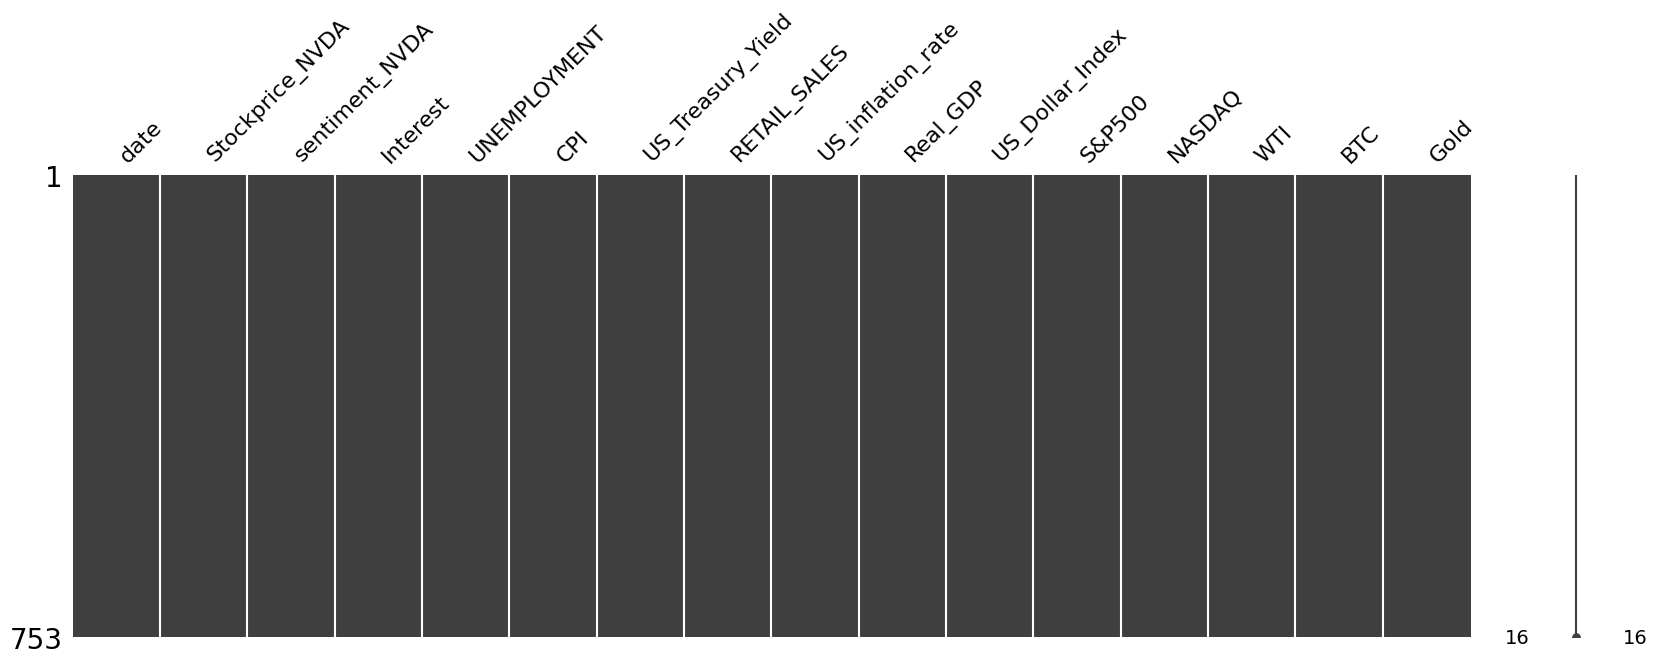

In [ ]:
mno.matrix(df_NVDA, figsize = (20, 6))

<Axes: >

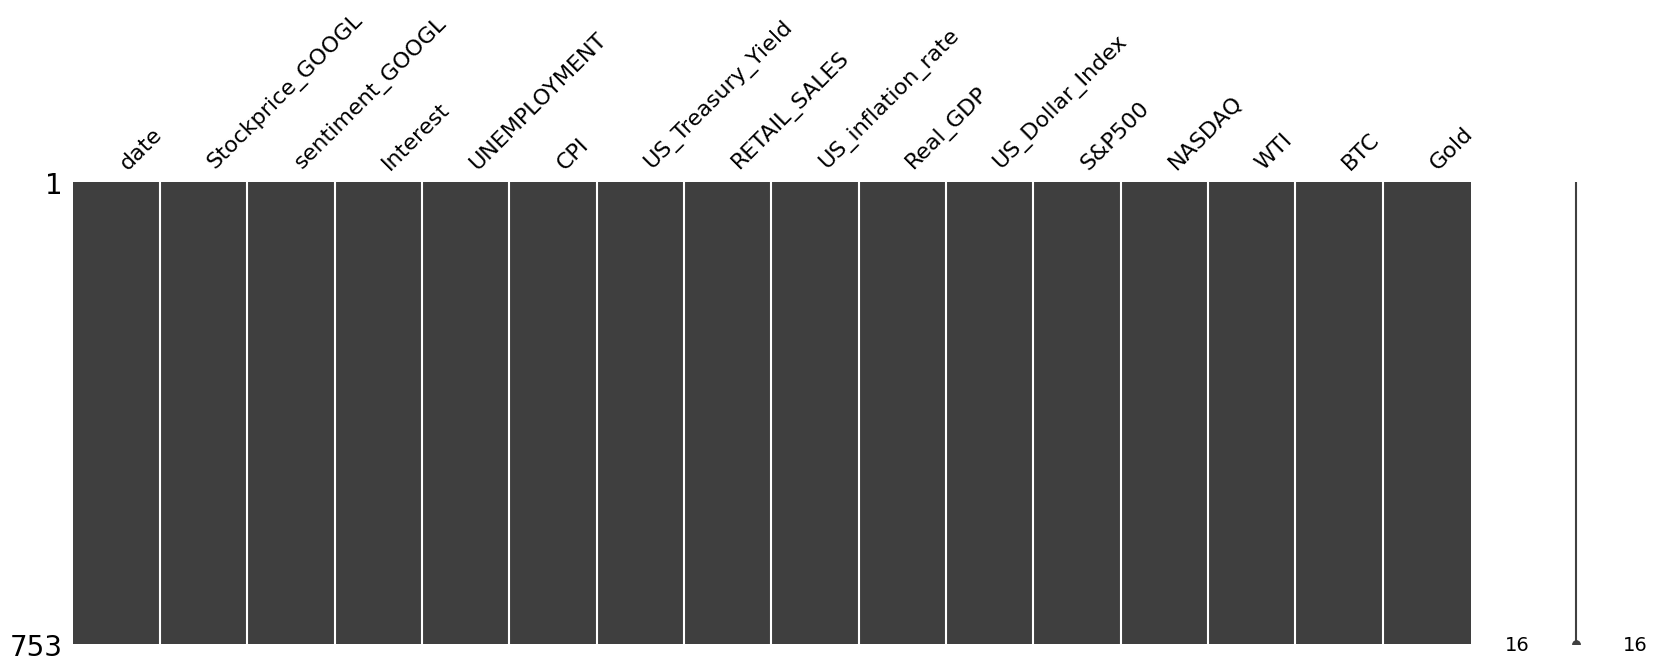

In [ ]:
mno.matrix(df_GOOG, figsize = (20, 6))

#Box plot

In [14]:
#df = df.drop(df.columns[[4,5,6,7,8,9]], axis = 1)

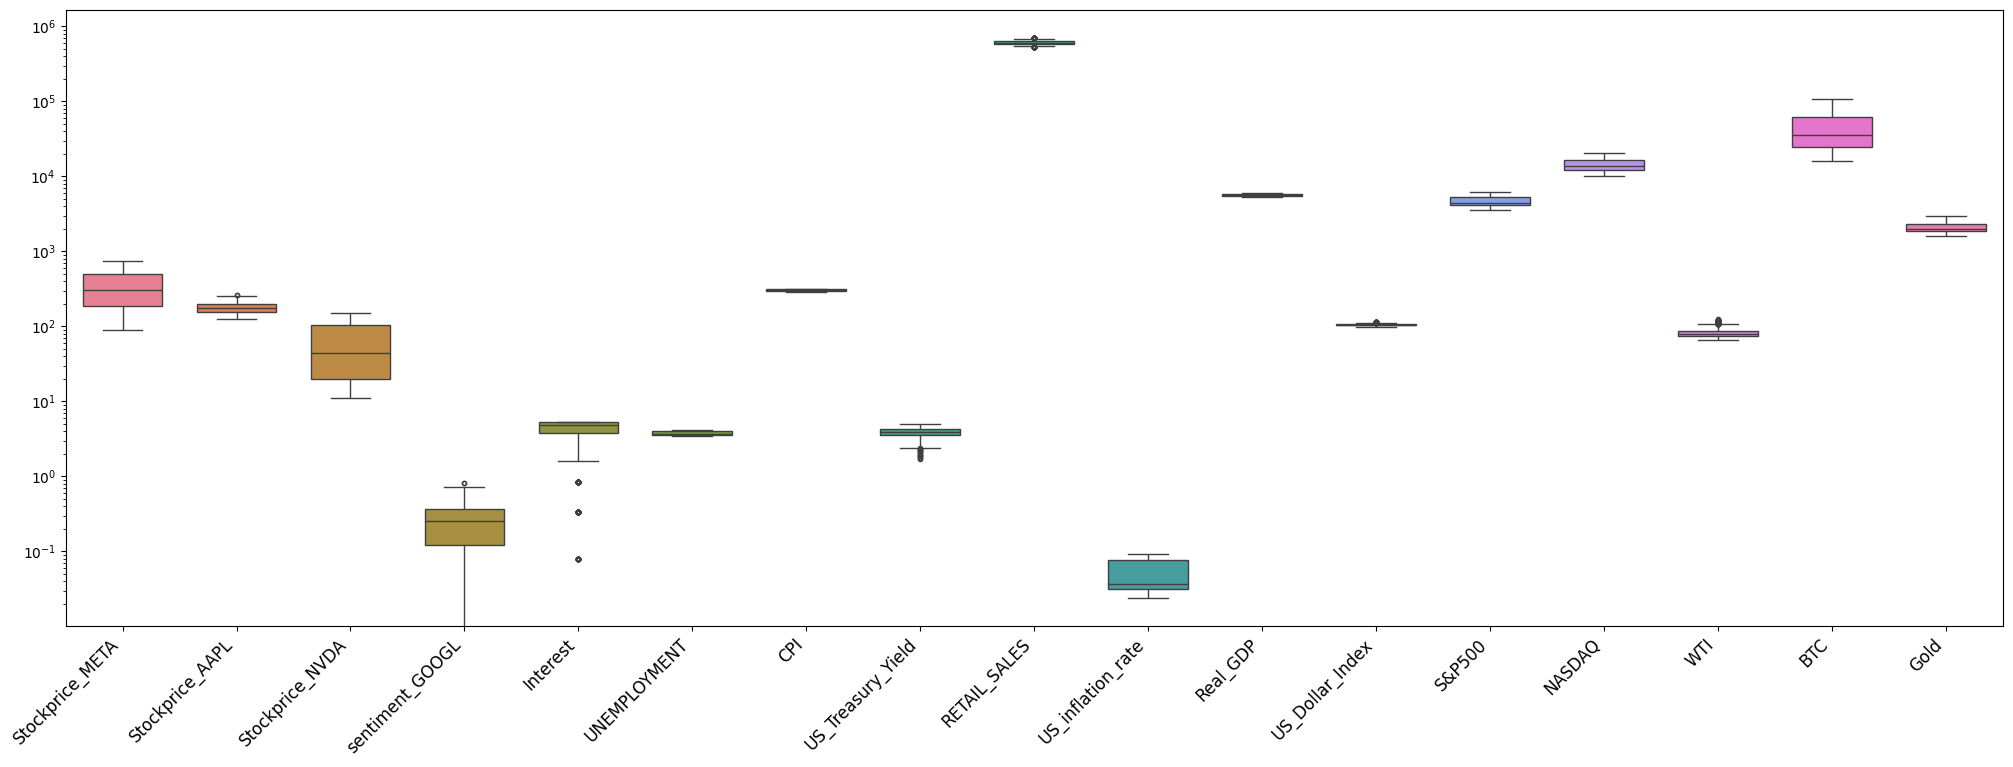

In [22]:
plt.figure(figsize=(25, 8))
sns.boxplot(data=df, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()

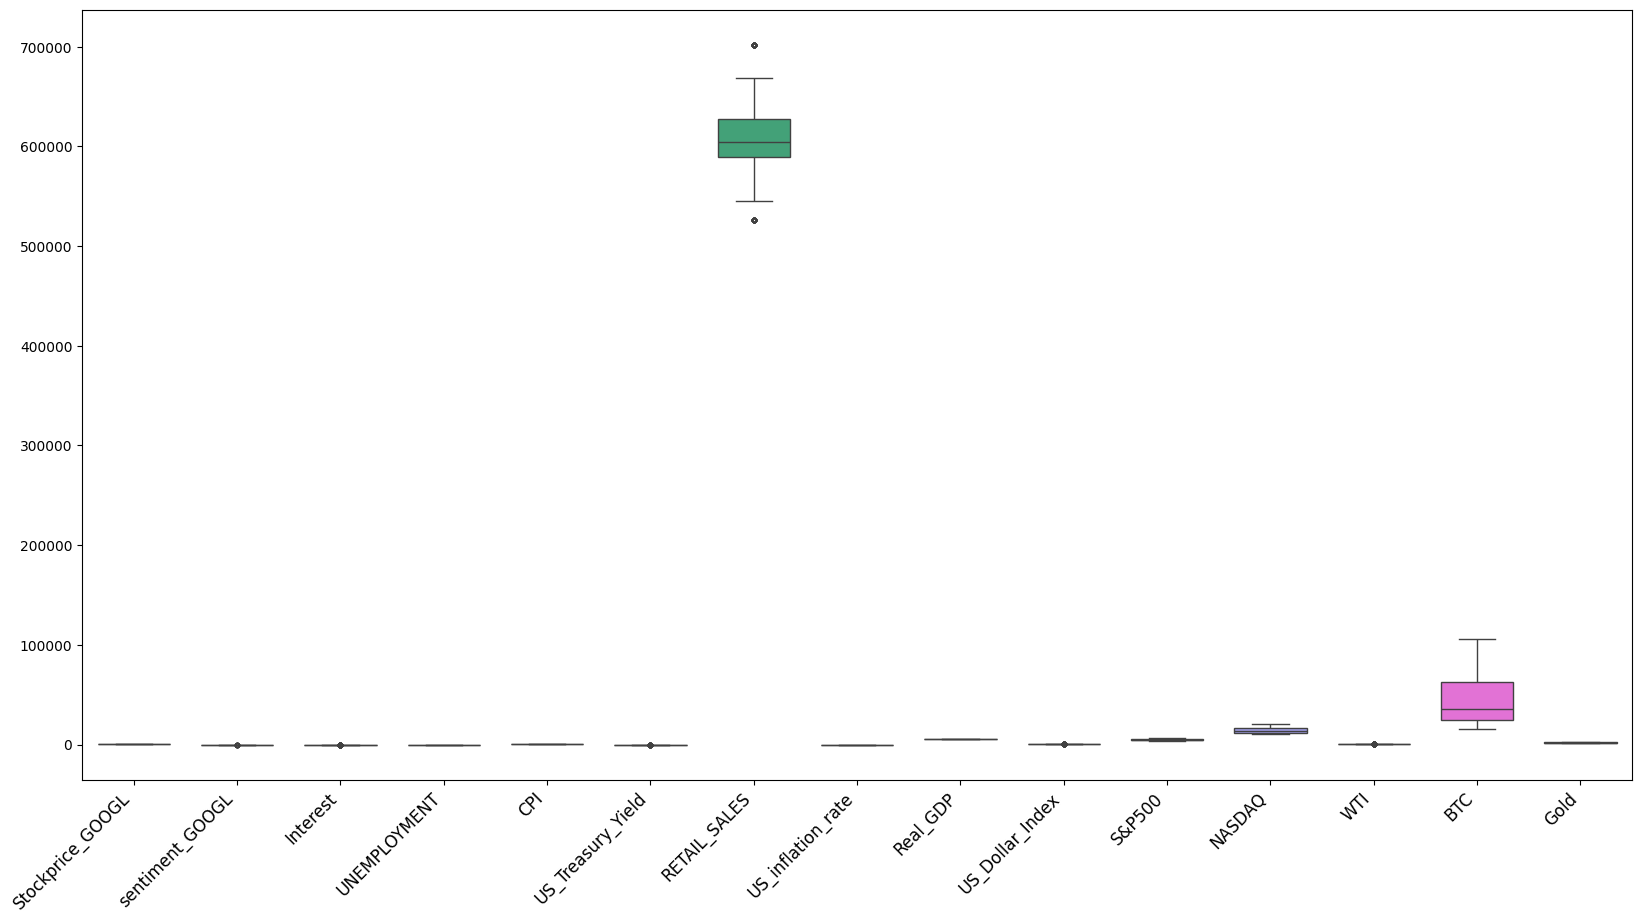

In [ ]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=df_GOOG, fliersize=3, width=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12) # หมุน 45 องศา และจัดชิดขวา
plt.xlabel('') # เอาชื่อแกนออกถ้าไม่จำเป็น
plt.show()

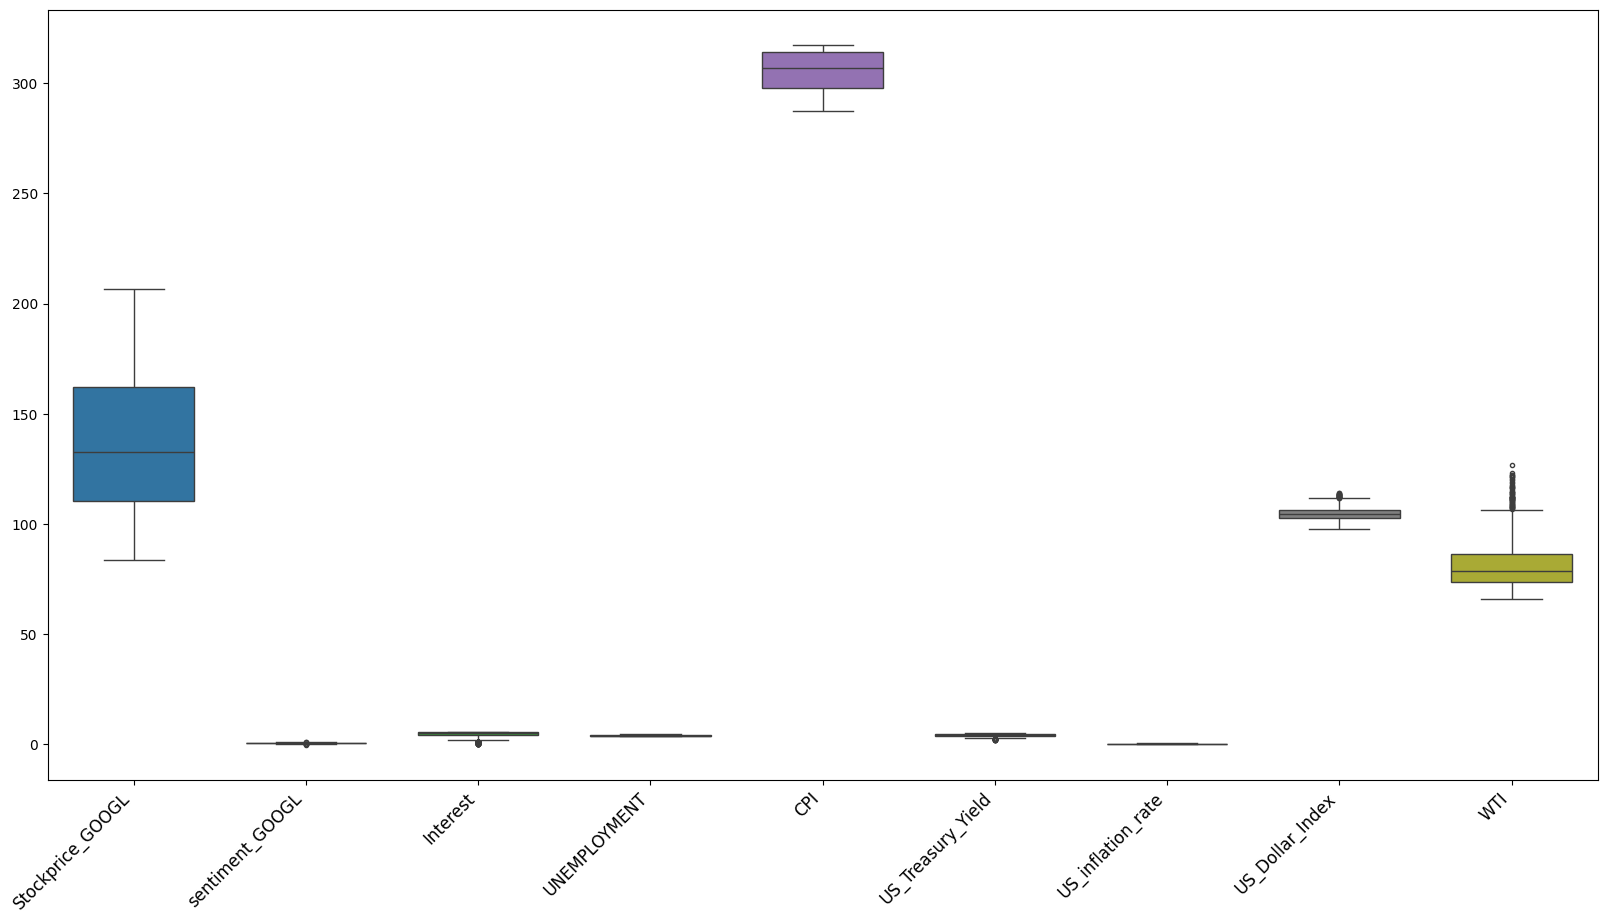

In [ ]:
cols_large = ['RETAIL_SALES', "BTC", 'S&P500', "NASDAQ", 'Real_GDP', "Gold"]
cols_small = [col for col in df_GOOG.columns if col not in cols_large]

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_GOOG[cols_small], fliersize=3, width=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

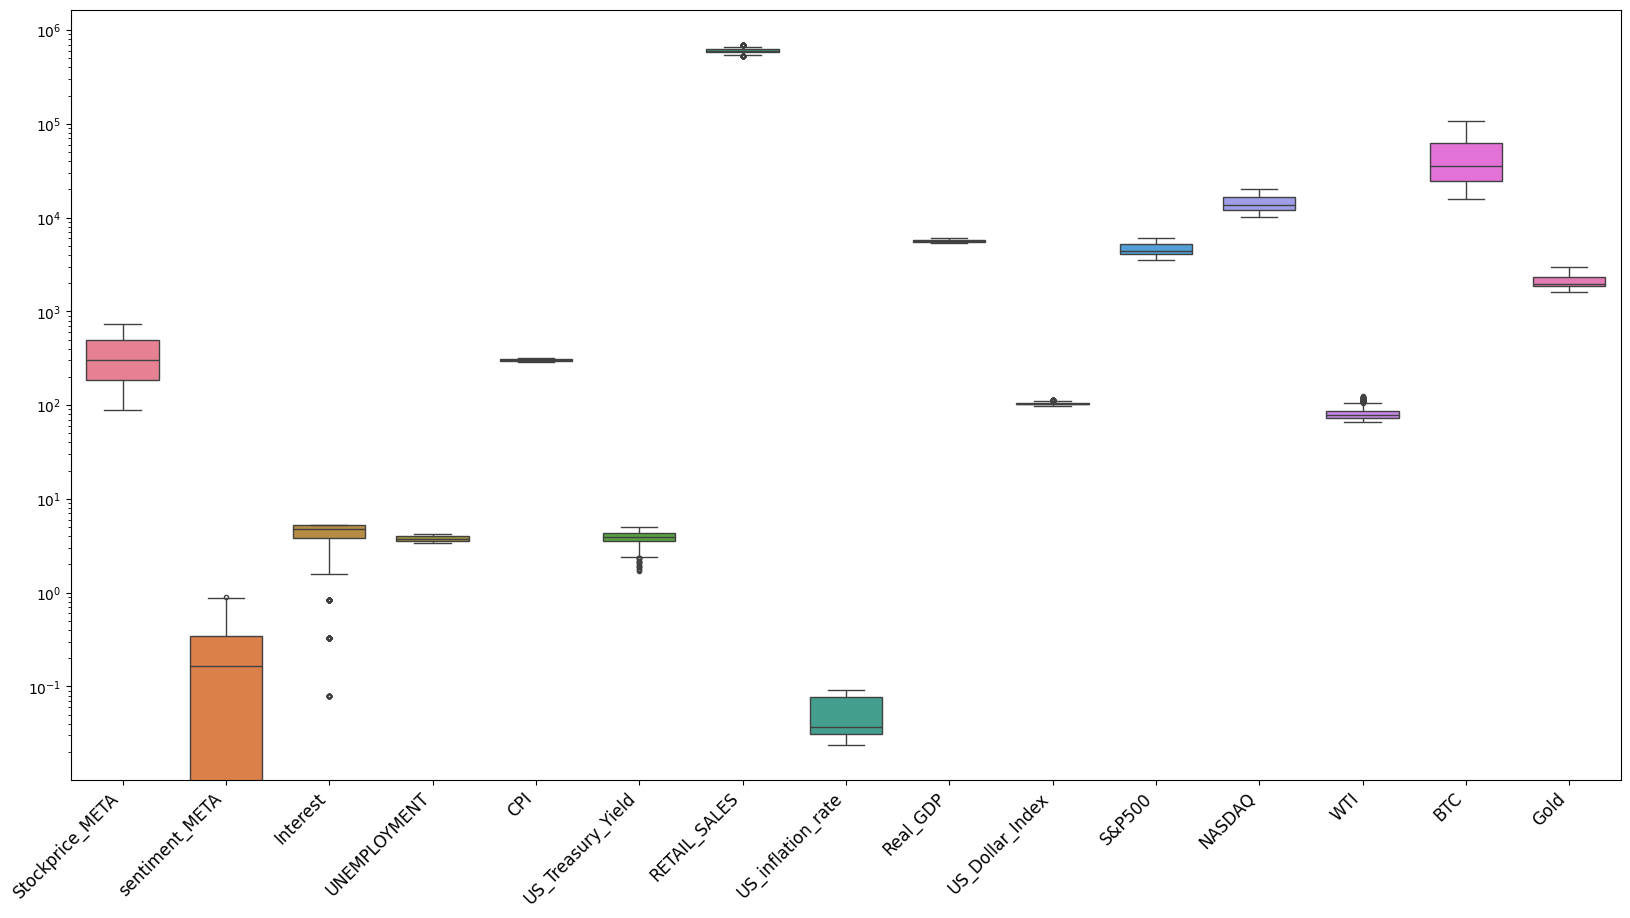

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_META, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()

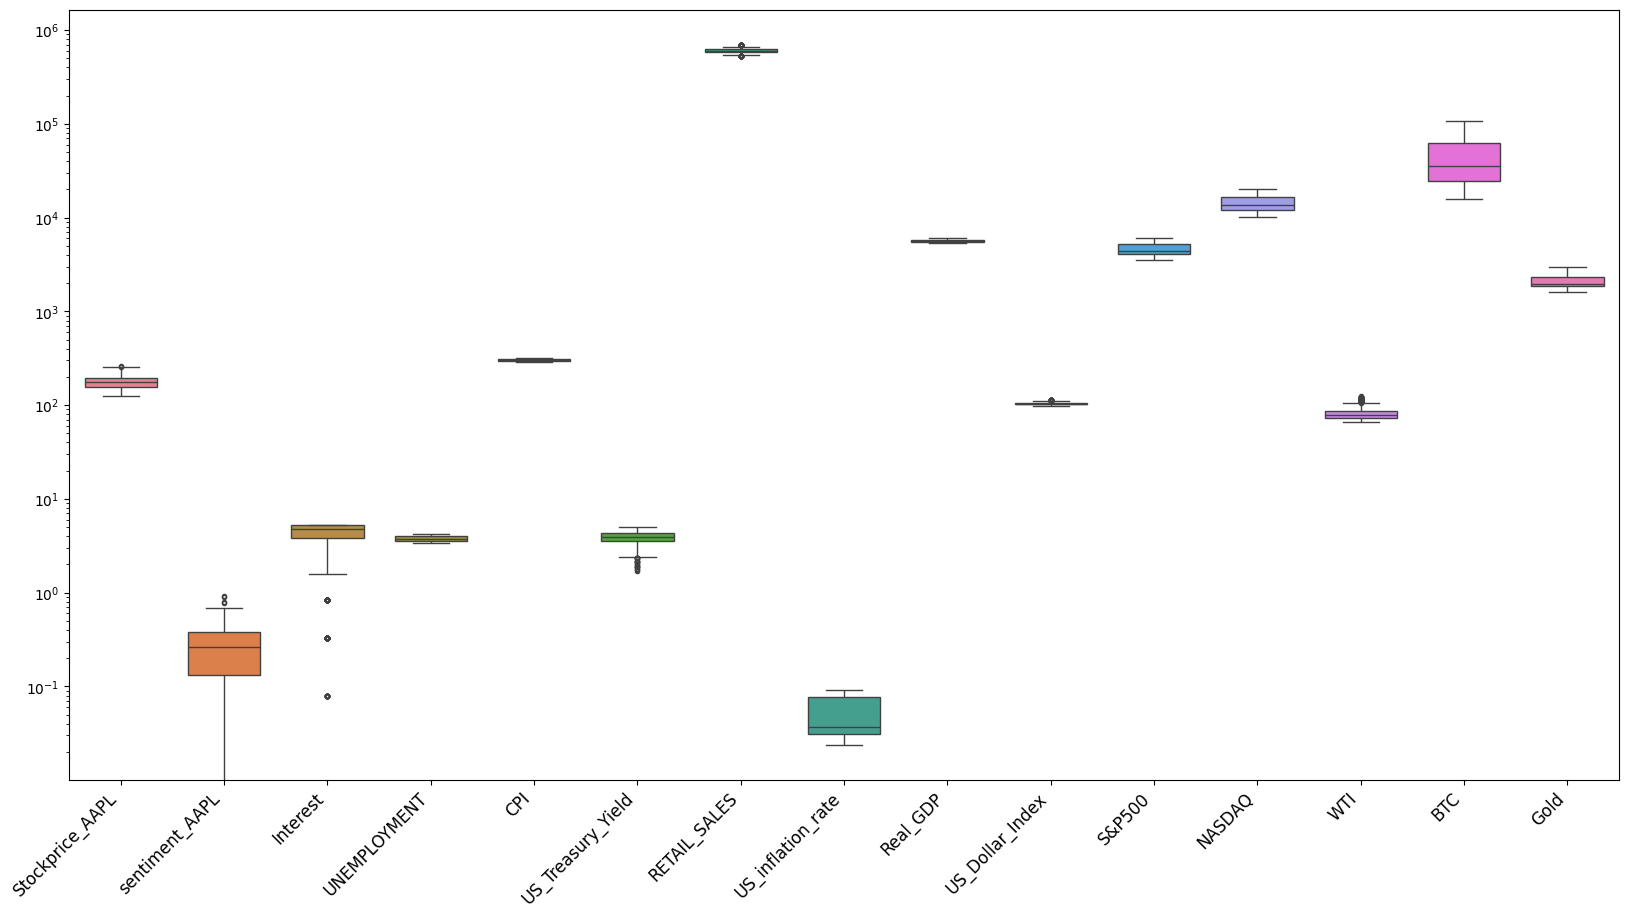

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_AAPL, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()

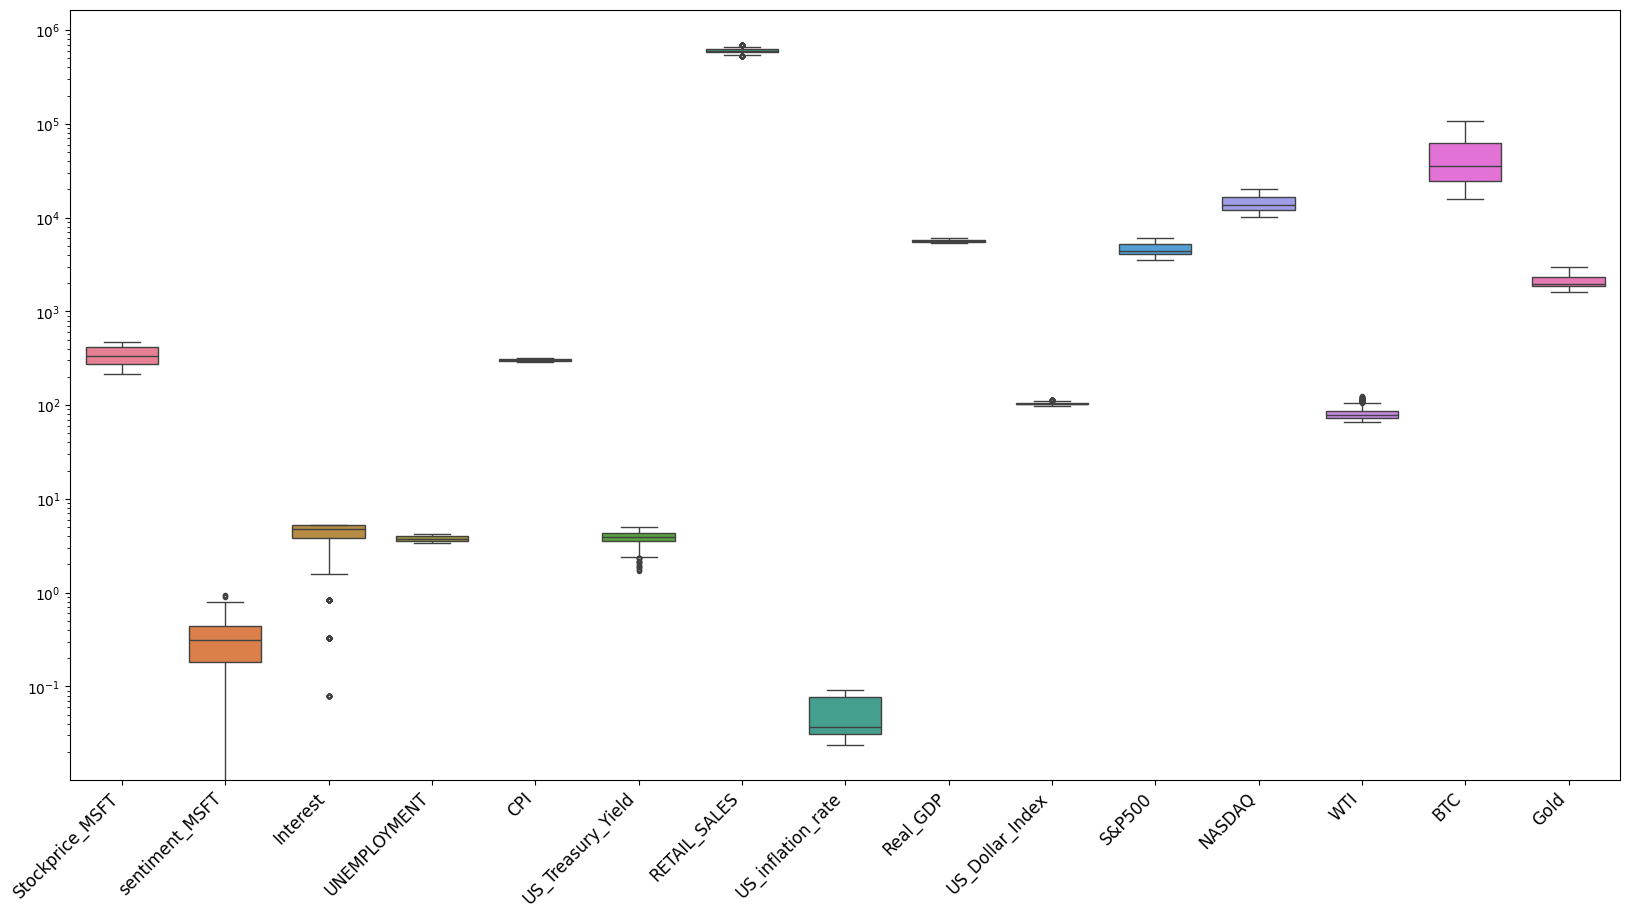

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_MSFT, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()

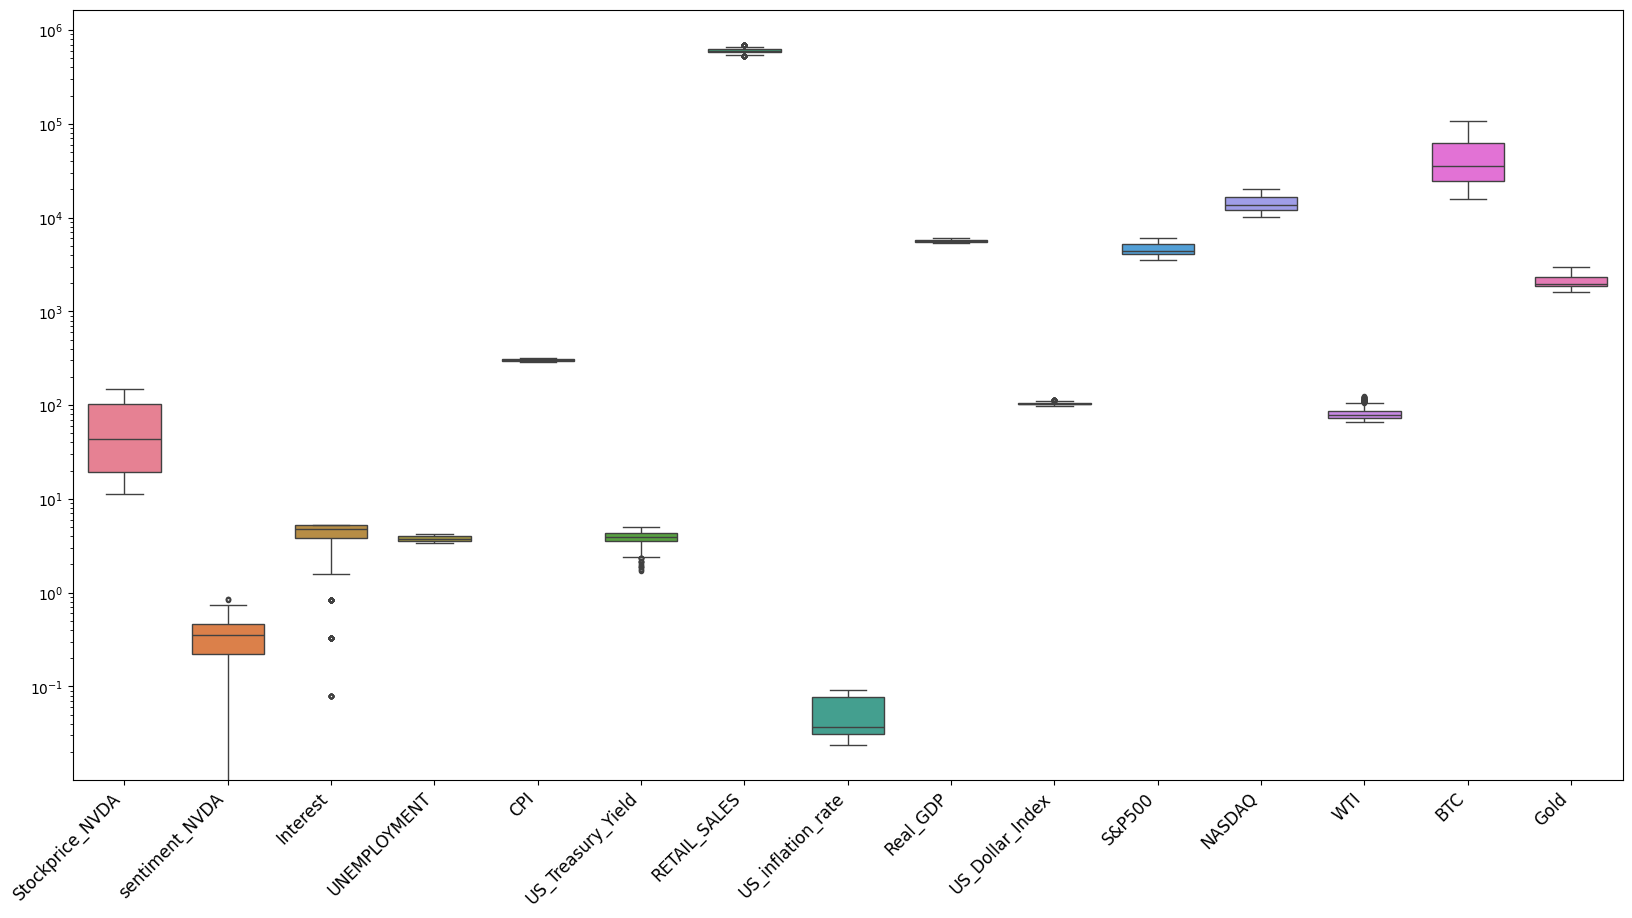

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_NVDA, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()

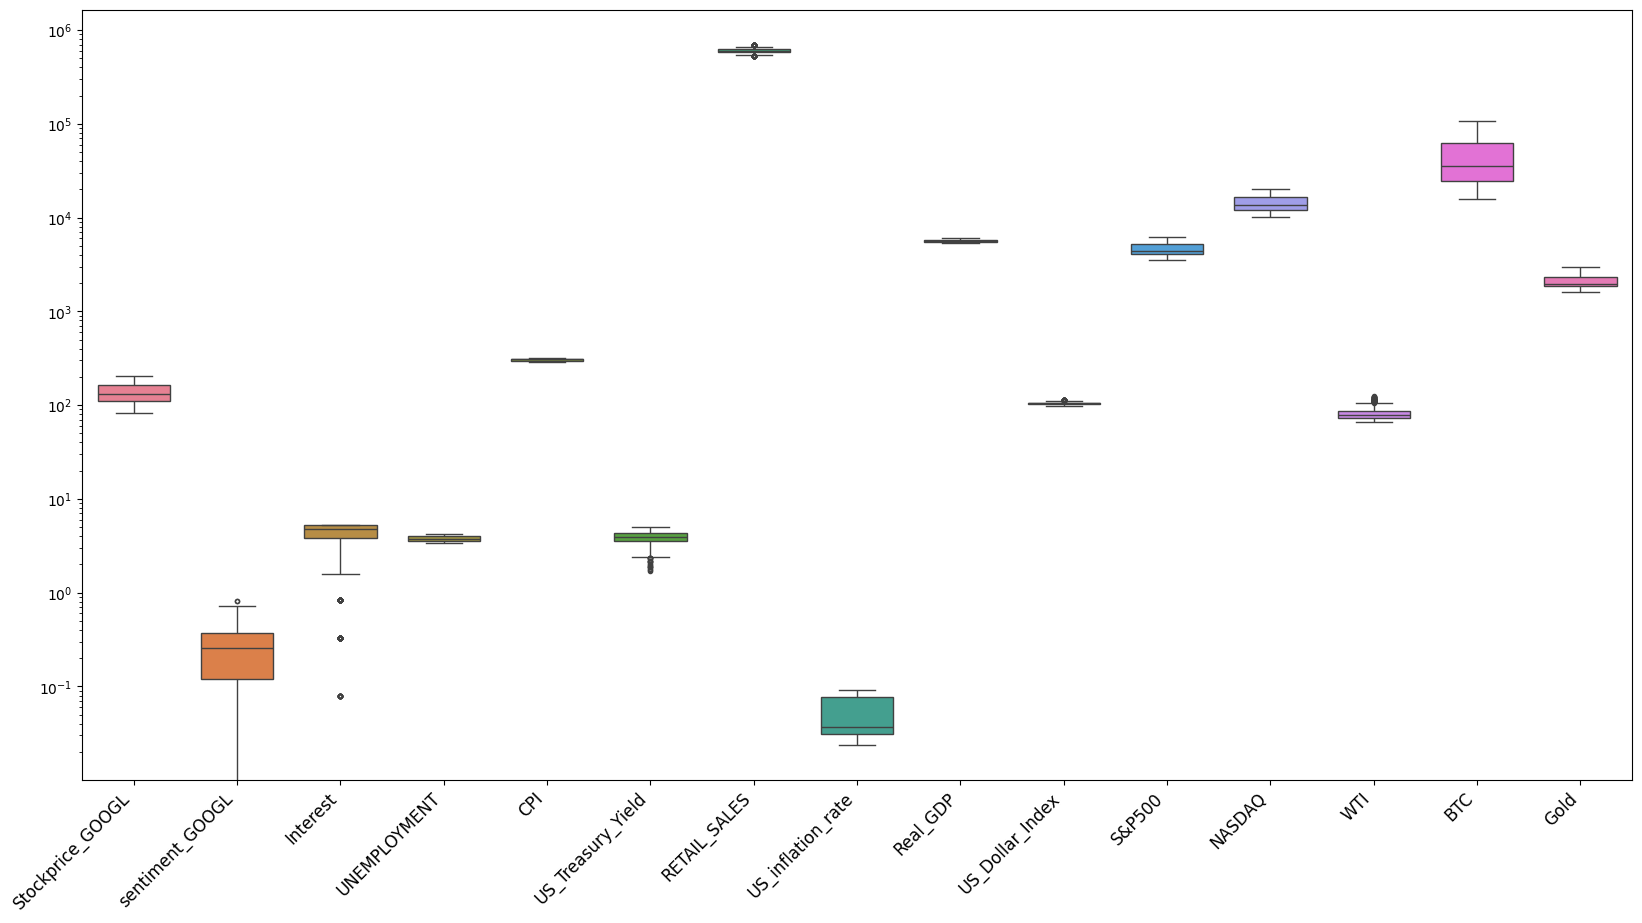

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_GOOG, fliersize=3, width=0.7)

plt.xticks(rotation=45, ha='right', fontsize=12)  # หมุนชื่อแกน X
plt.yscale('log')  # ใช้ log scale กับแกน Y เพื่อให้ค่าที่แตกต่างกันมากดูสมดุลขึ้น
plt.show()